In [1]:
from sklearn.datasets import load_boston
df = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
len(df["feature_names"])

13

In [17]:
X = df.data
y = df.target

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = LinearRegression()

r2s = []
rmses = []
comp_num = []

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Seperating literature data to training and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#PCA
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_X_train = std.fit_transform(X_train)
std_X_test = std.fit_transform(X_test)

for idx, comp in enumerate(range(1, 14)):
  pca = PCA(n_components=comp)

  X_train_reduced = pca.fit_transform(std_X_train)
  X_test_reduced = pca.fit_transform(std_X_test)

  model.fit(X_train_reduced, y_train)
  y_train_pred = model.predict(X_train_reduced)
  
  r2 = r2_score(y_train_pred, y_train)
  rmse = mean_squared_error(y_train_pred, y_train, squared=False)

  comp_num.append(idx+1)
  r2s.append(r2)
  rmses.append(rmse)


In [22]:
r2s

[-0.7351108210724384,
 -0.3344852535138978,
 0.36550387190404887,
 0.4178312658947406,
 0.5312937878041694,
 0.5465840808885644,
 0.5548066553524238,
 0.5703333725621417,
 0.571224995851006,
 0.5964957894211985,
 0.6007227402506596,
 0.6272610798451028,
 0.6456093081919421]

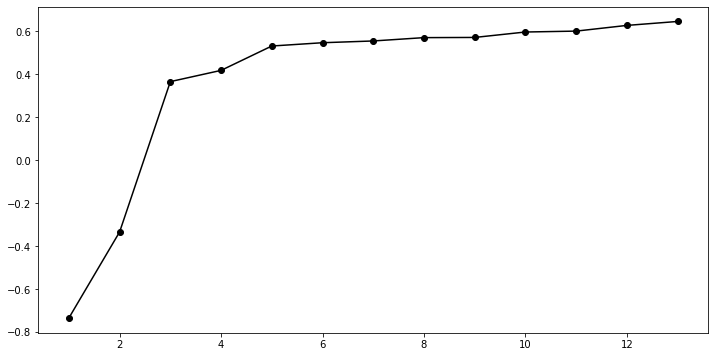

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(comp_num, r2s, "k-o")

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

In [27]:
PCR_model = make_pipeline(StandardScaler(), 
                          PCA(n_components=3), 
                          LinearRegression())
PCR_model.fit(X_train, y_train)
PCR_model.score(X_train, y_train)

0.6118093416133785

In [10]:
# パイプライン定義
PCR_model = make_pipeline(StandardScaler(), 
                          PCA(), 
                          LinearRegression())
# 探索範囲
param = {
    'pca__n_components' : np.arange(1, len(X[0])+1)
}
# グリッドサーチのインスタンス生成
PCR_grid = GridSearchCV(PCR_model,
                        param_grid=param,
                        cv=10
                        ) 
# グリッドサーチの実行
PCR_grid.fit(X_train, y_train)
# 最適パラメータ
PCR_grid.best_params_

{'pca__n_components': 13}

In [13]:
PCR_grid.score(X_train, y_train)

0.7383393920590519